# __Project 2__

# Evaluating the relationship between attendance and SAT Average Math Score

Using school attendance and SAT score datasets from schools in NYC to estimate the relationship between percentage attendance and SAT Average Math score

In [126]:
import pandas as pd
import plotly.express as px

In [127]:
#Loading the school attendance dataset 
schattend = pd.read_csv('Daily Attendance by School 2012-15.csv')

In [128]:
#calculation for percentage students present on average 
schattend['Percentage_present'] = (schattend['Present'] / schattend['Enrolled']) * 100
schattend

,School,Date,SchoolYear,Enrolled,Present,Absent,Released,Percentage_present
0,01M015,20120906,20122013,165,140,25,0,84.848485
1,01M015,20120907,20122013,168,144,24,0,85.714286
2,01M015,20120910,20122013,167,154,13,0,92.215569
3,01M015,20120911,20122013,169,154,15,0,91.124260
4,01M015,20120912,20122013,170,159,11,0,93.529412
...,...,...,...,...,...,...,...,...
857615,79X695,20150622,20142015,356,54,48,254,15.168539
857616,79X695,20150623,20142015,353,102,75,176,28.895184
857617,79X695,20150624,20142015,351,82,81,188,23.361823
857618,79X695,20150625,20142015,351,77,76,198,21.937322


The student attendance data set consisted of daily attendance data from 2012 to 2015. Out of this, only data from 2012 is relevant for the currrent analysis. The data set is filtered for data from 2012 and subsequently annual averages of the attendance are estimated. 

In [129]:
# filtering data from 2012
schattend  = schattend [schattend ['SchoolYear'] == 20122013]

In [130]:
schattend = schattend.rename(columns={'School': 'DBN'})

In [131]:
#grouping data by school ID and averaging on present, absent and percentage variables 
schattend_annual = schattend.groupby('DBN')[['Present', 'Absent','Percentage_present']].mean().reset_index()

In [132]:
schattend_annual 

,DBN,Present,Absent,Percentage_present
0,01M015,168.730337,15.522472,91.412635
1,01M019,277.286517,22.089888,92.377158
2,01M020,582.455056,41.033708,93.240950
3,01M034,369.533708,36.966292,90.808641
4,01M063,158.320225,13.353933,92.052747
...,...,...,...,...
1598,75X721,409.252809,91.078652,81.617805
1599,75X754,365.275281,211.039326,61.985863
1600,75X811,490.516854,117.808989,80.378540
1601,79Q344,605.505682,265.125000,66.244057


Once the school attendance dataset is clean and organised, we then load the SAT dataset and process it. 

In [133]:
#loading SAT dataset 
schsat = pd.read_csv('2012_SAT_Results_20241126.csv')

In [134]:
schsat

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


The SAT dataset is loaded and subsequently combined with the attendance dataset to estimate the relationship between the SAT Math Average Score and the attendance in school. Before the relationship can be estimated non numeric values need to be removed. 

In [135]:
## Merging the attendance and SAT datasets 
merged_schdata = pd.merge(schsat, schattend_annual , on='DBN', how='inner')

#Converting math score to numeric values 
merged_schdata['SAT Math Avg. Score'] = pd.to_numeric(merged_schdata['SAT Math Avg. Score'], errors='coerce')

In [136]:
#dropping null/non numeric values 
merged_schdata = merged_schdata.dropna(subset=['SAT Math Avg. Score'])

In [137]:
merged_schdata

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Present,Absent,Percentage_present
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404.0,363,292.457627,68.096045,76.558676
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423.0,366,271.601227,50.398773,84.335155
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402.0,370,541.179775,41.820225,87.846384
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401.0,359,126.725610,70.957317,63.761075
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433.0,384,286.048780,72.213415,79.765699
...,...,...,...,...,...,...,...,...,...
450,32K552,ACADEMY OF URBAN PLANNING,67,342,364.0,354,262.554878,93.164634,73.800966
451,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428,465.0,422,273.050562,12.865169,92.207410
452,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358.0,350,338.396341,72.695122,82.263334
453,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317.0,358,173.085366,113.060976,60.094698


In [138]:
#sorting the data in ascending order 
merged_schdata = merged_schdata.sort_values(by='SAT Math Avg. Score')

The merged datasets are then plotted as a scatter plot to evaluate the relationship. The scatter plot can be used to observe correlations and not causation amongst variables. 

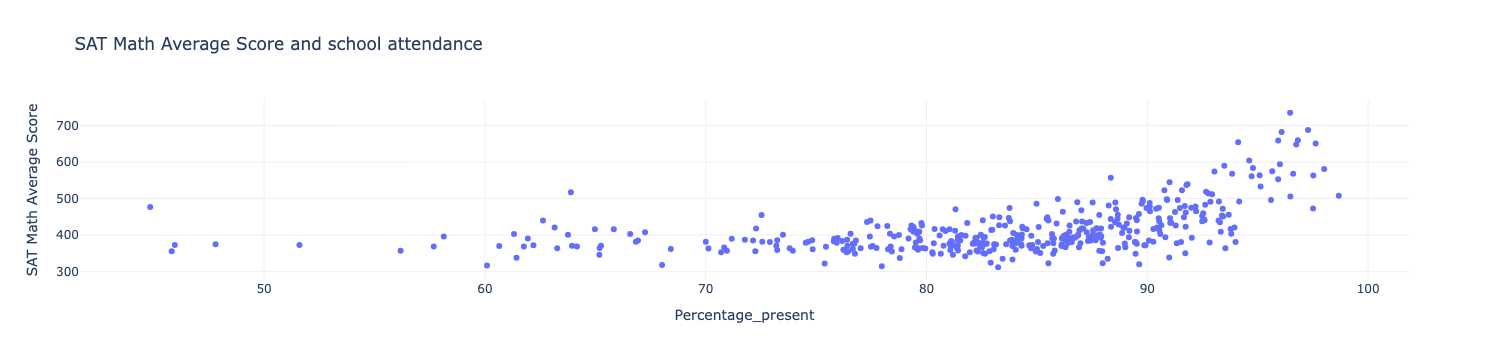

In [139]:
fig = px.scatter(
    merged_schdata,
    x='Percentage_present',
    y='SAT Math Avg. Score',
    title='SAT Math Average Score and school attendance',
    labels={'Present': 'Percentage_present(Percentage of students present on average)', 'SAT Math Avg. Score': 'SAT Math Average Score'},
    template='plotly_white'
    )

# Show the plot
fig.show()

The graph shows interesting findings. While it is not obvious that there is a strong relationship between higher attendance and a high SAT Math Average score, one may observe that students schools with average attendance less than 70% have a lower SAT Math Average score. Whereas, schools with attendance higher than 90% have a higher SAT Math Average score. The high score may not be a result of attendace since students with higher attendance may also have other factors contributing to a higher score. 